In [ ]:
import os
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

logger.info("Initialising.....")

In [ ]:
data = pd.read_csv('/content/kc_house_data.csv')

In [ ]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# **EDA**

In [ ]:
logger.info(f"Dataset Shape: {data.shape}")
logger.info(f"Dataset Sample:\n{data.head()}")

In [ ]:
logger.info("Performing Basic EDA...")


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


1. The dataset has 21 columns and 21,613 observations.
2. There are no missing values in any of the columns, which simplifies cleaning. The average house price sits around 540,000 dollars, and the maximum price is 7.7 million dollars, there is a wide range of property values.
3. Bedrooms range from 0 to 33, but most homes have 3 to 4 bedrooms.
4. The average number of bathrooms is about 2. 5. The median living area is 1,910 sq ft.
6. The mean year built is 1971, with renovation years spanning up to 2015.

In [ ]:
print(data.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


Price, Bedrooms and sqft_living seem suspicious, might have outliers

Confirms that there are no null values.

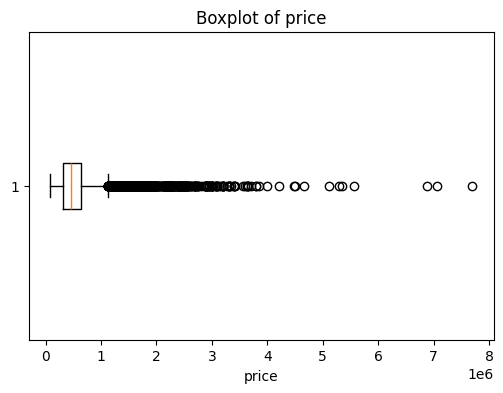

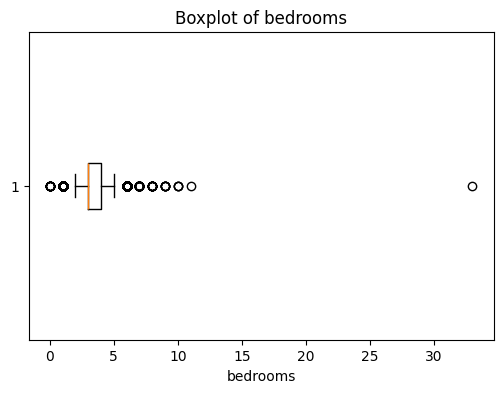

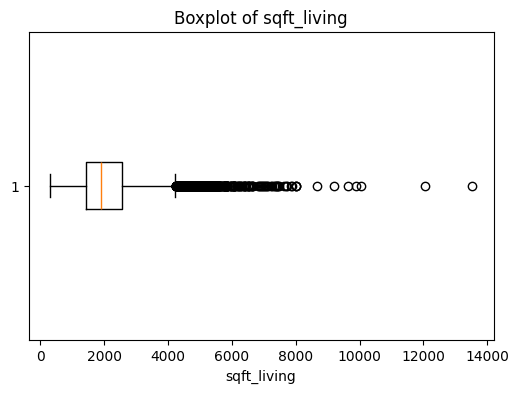

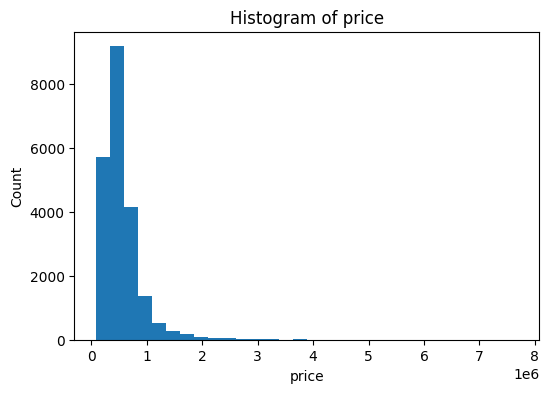

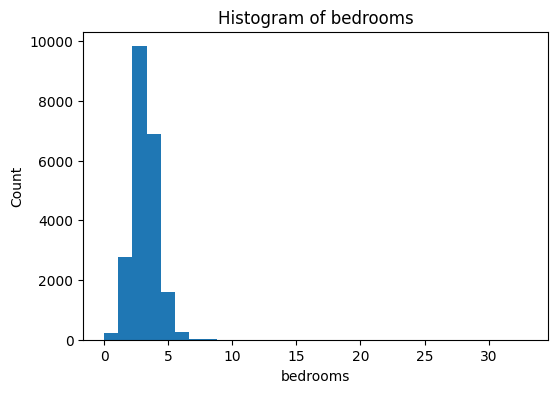

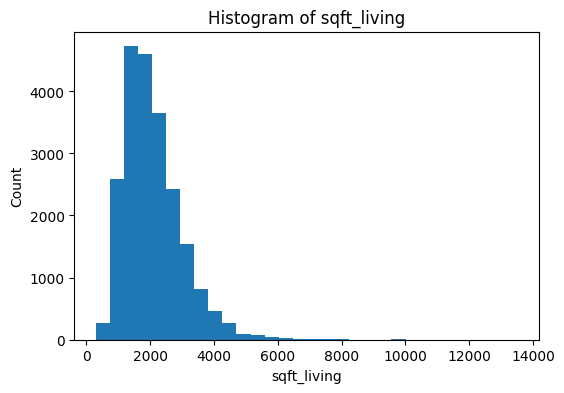

In [ ]:
features_to_check = ['price', 'bedrooms', 'sqft_living']

# Boxplots
for feature in features_to_check:
    plt.figure(figsize=(6, 4))
    plt.boxplot(data[feature], vert=False)
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

# Histograms
for feature in features_to_check:
    plt.figure(figsize=(6, 4))
    plt.hist(data[feature], bins=30)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


Nothing too extreme here

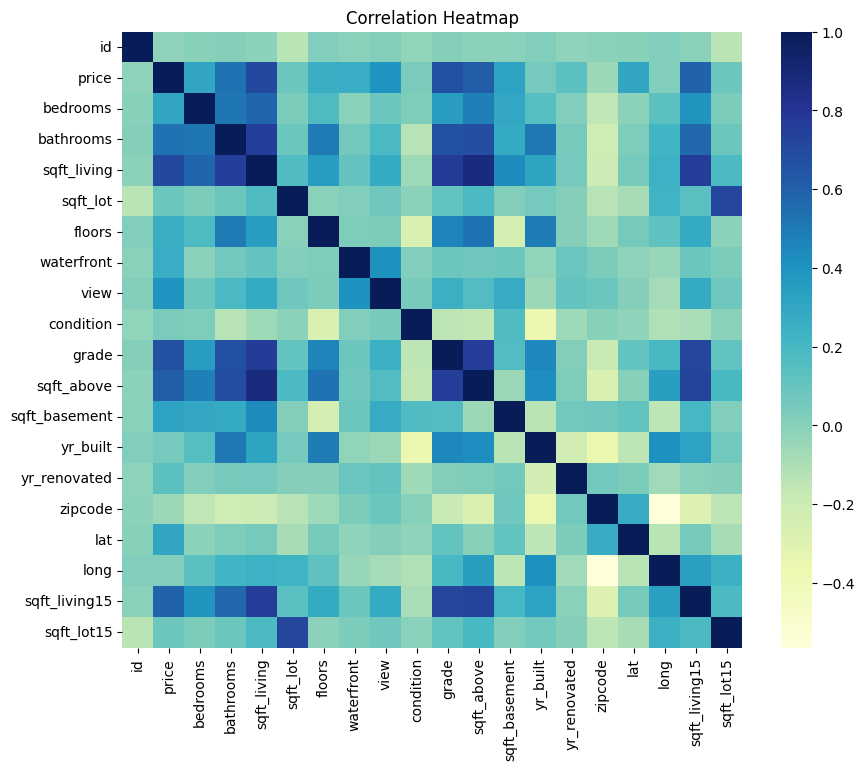

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
zipcode          0.053203
condition        0.036362
long             0.021626
id               0.016762
Name: price, dtype: float64


In [ ]:
plt.figure(figsize=(10, 8))
corr_matrix = data.select_dtypes(include=np.number).corr()
sns.heatmap(corr_matrix, annot=False, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()

corr_with_price = corr_matrix['price'].abs().sort_values(ascending=False)
print(corr_with_price)

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>]], dtype=object)

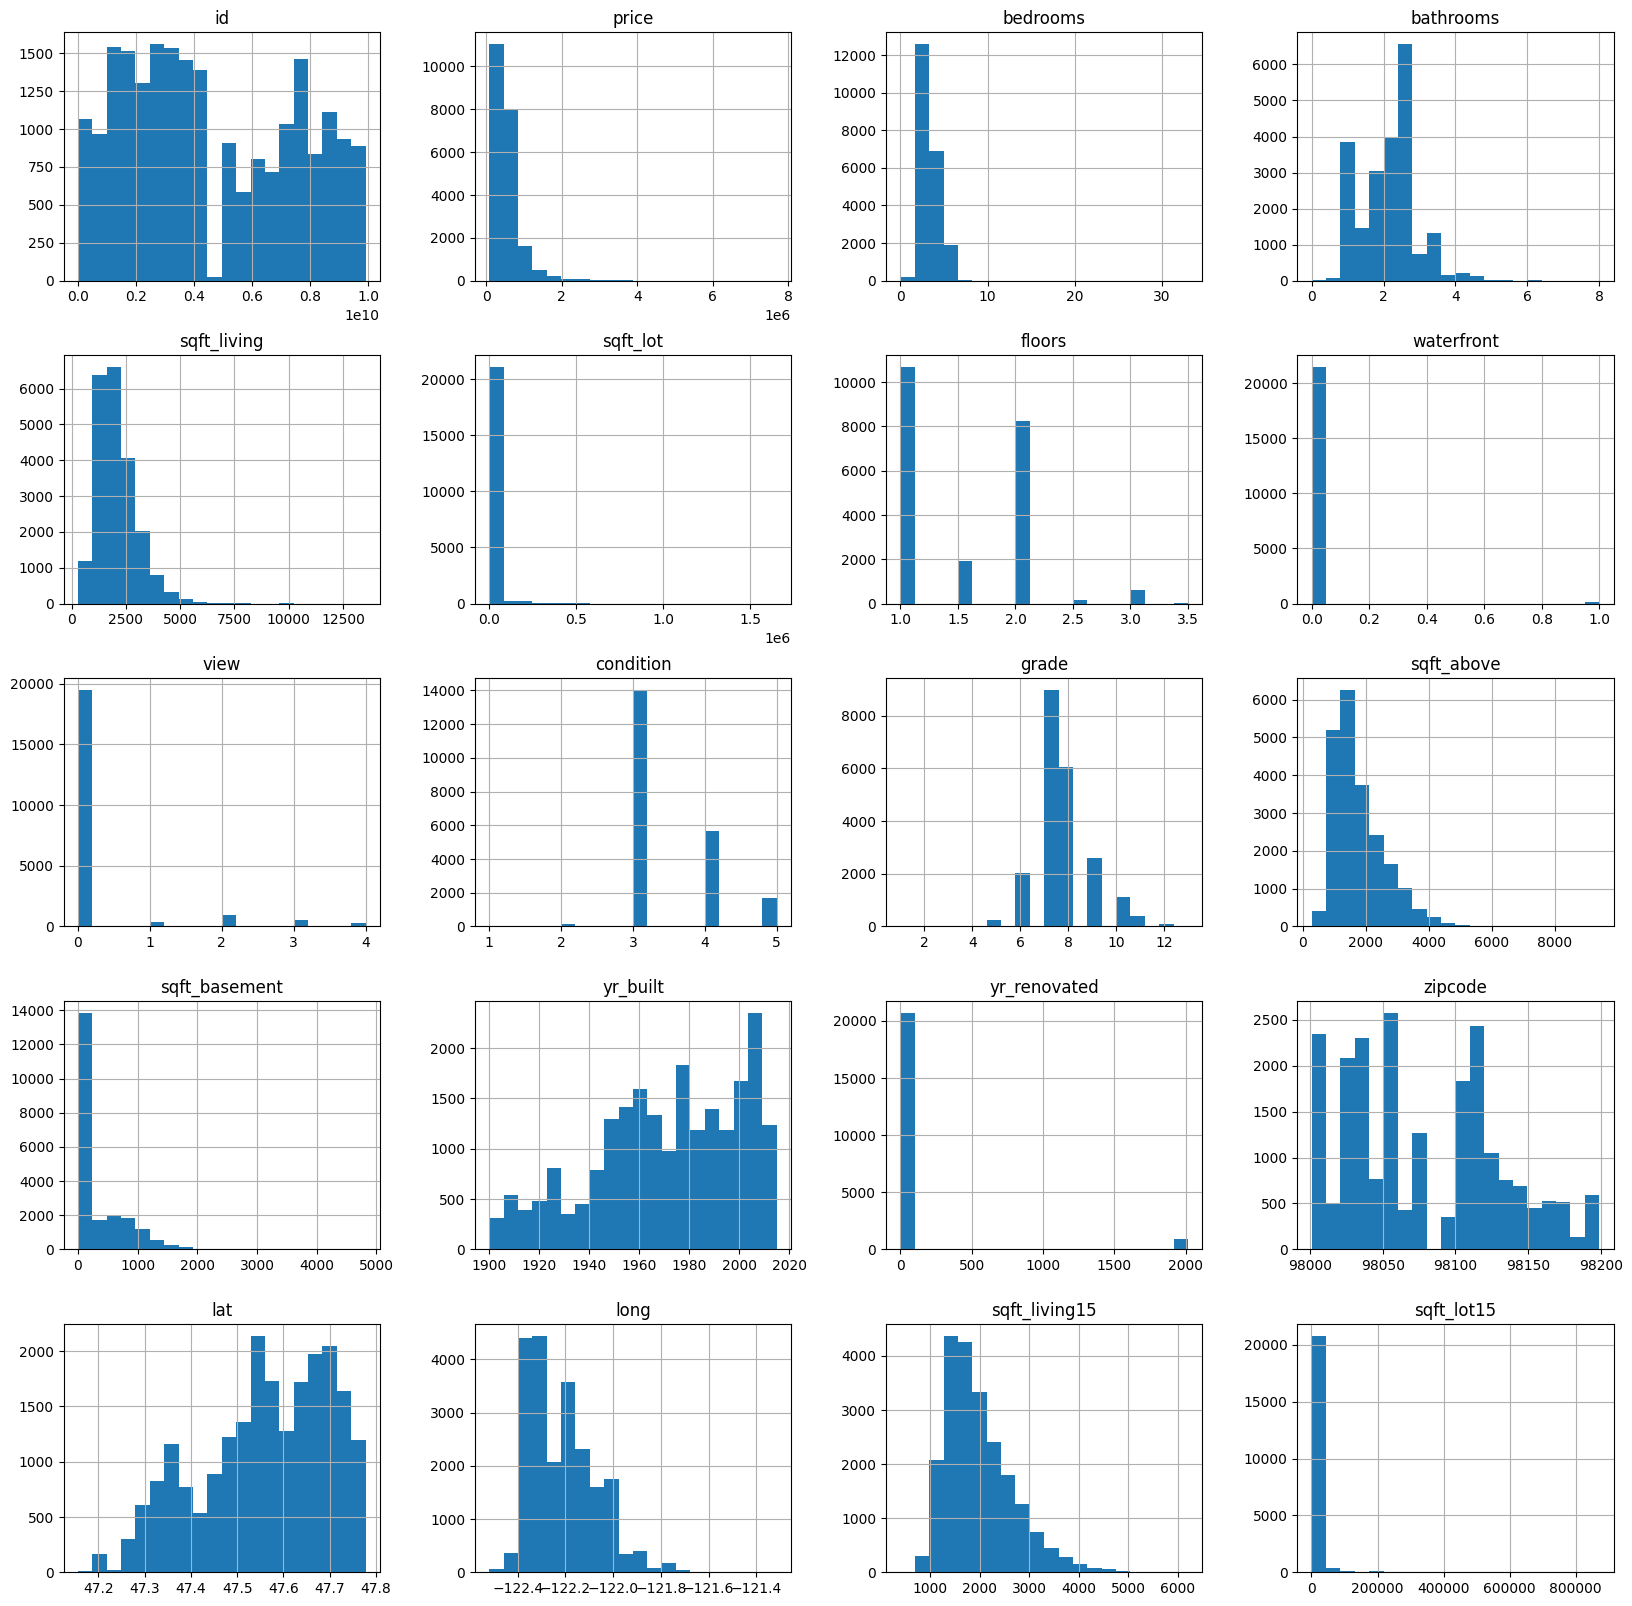

In [ ]:
data.hist(bins=20,figsize=(20,20))

From this we can conclude we should choose only a few features, as not all provide good correlation with fluctuating price.

In [ ]:
data_subset = data[ ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built']   ]

In [ ]:
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   sqft_above     21613 non-null  int64  
 6   sqft_basement  21613 non-null  int64  
 7   yr_built       21613 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 1.3 MB


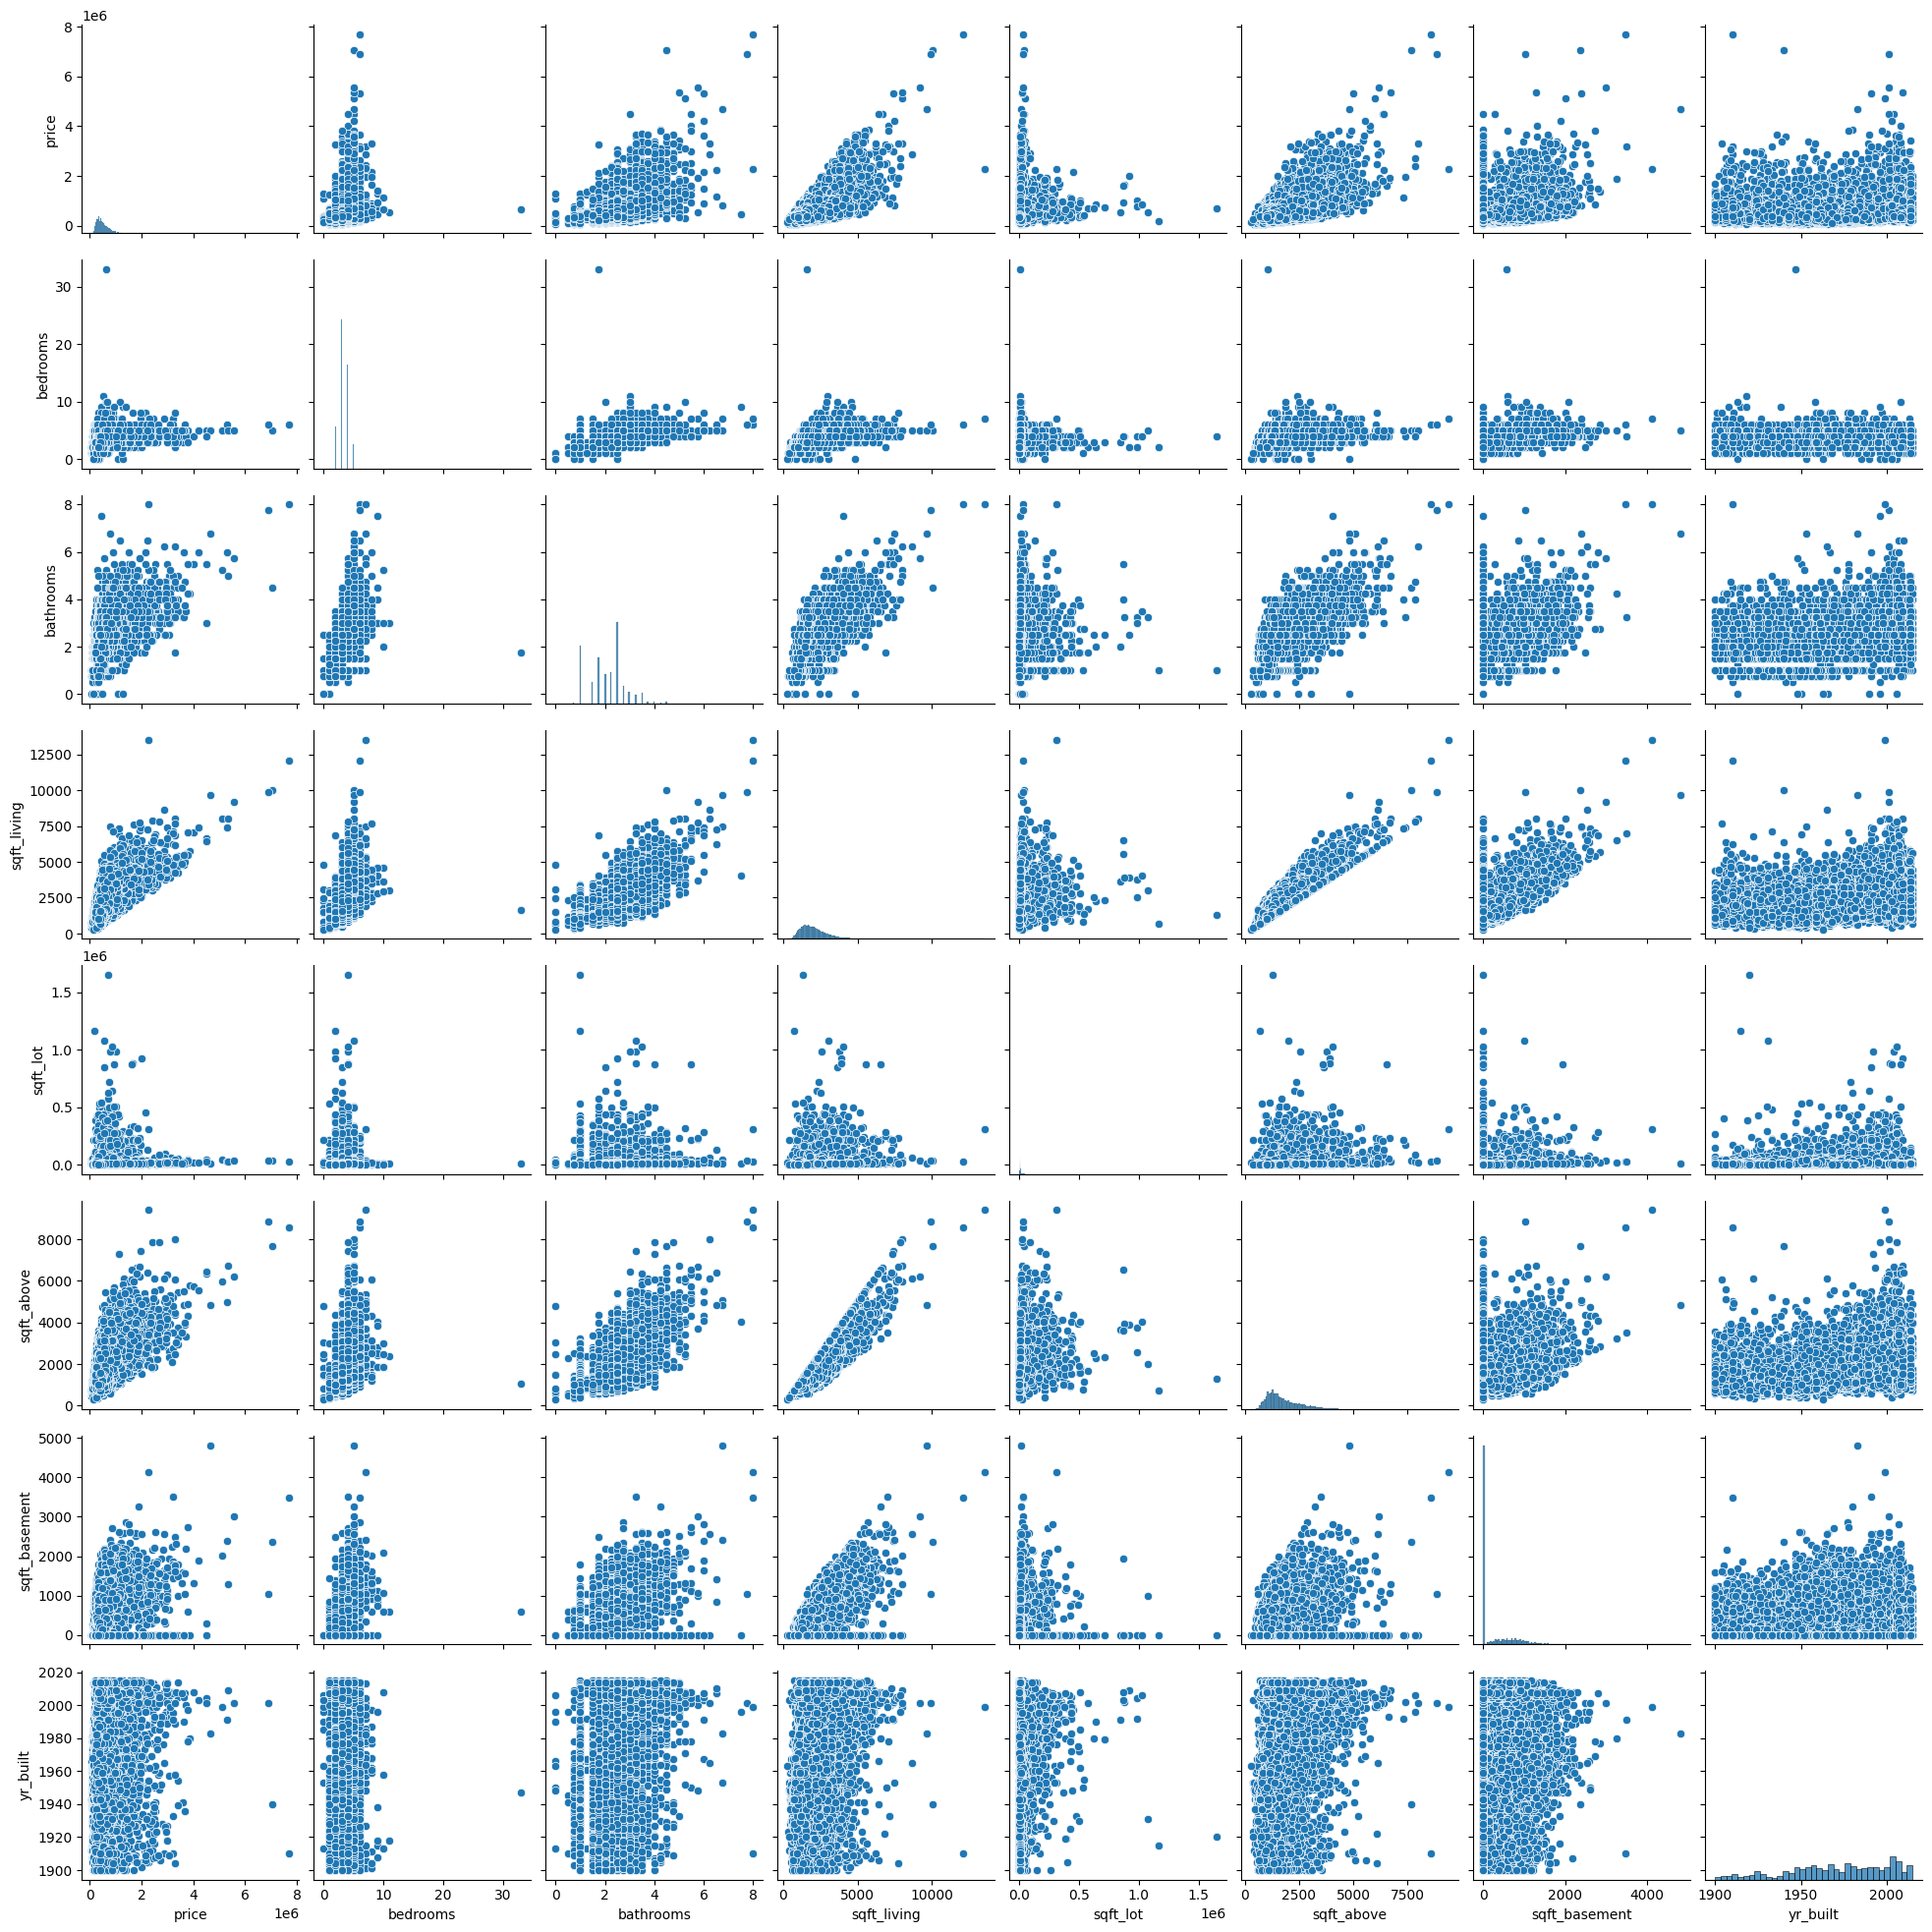

In [ ]:
sns.pairplot(data_subset)

we can further remove year built, as it is not affecting price.

In [ ]:
data_subset = data_subset.drop('yr_built', axis=1)

Now, we can seperate the Features and the Target

In [ ]:
X = data_subset.drop('price', axis=1)
y = data_subset['price']

In [ ]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement
0,3,1.00,1180,5650,1180,0
1,3,2.25,2570,7242,2170,400
2,2,1.00,770,10000,770,0
3,4,3.00,1960,5000,1050,910
4,3,2.00,1680,8080,1680,0
...,...,...,...,...,...,...
21608,3,2.50,1530,1131,1530,0
21609,4,2.50,2310,5813,2310,0
21610,2,0.75,1020,1350,1020,0
21611,3,2.50,1600,2388,1600,0


In [ ]:
X.shape


(21613, 6)

In [ ]:
y.shape

(21613,)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=StandardScaler()
X_scaled= scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
logger.info("Data split into train and test sets.")

In [ ]:
!pip install xgboost
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
# Dictionary of baseline models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

results = {}  # to store the performance of each model

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluate
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Print performance
    print(f"{model_name} Results:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE:  {mae:.2f}")
    print(f"  R2:   {r2:.2f}")
    print("-" * 30)

    # Store in results dict
    results[model_name] = (rmse, mae, r2)


Linear Regression Results:
  RMSE: 272071.94
  MAE:  174557.70
  R2:   0.51
------------------------------
Decision Tree Results:
  RMSE: 357918.32
  MAE:  216943.67
  R2:   0.15
------------------------------
Random Forest Results:
  RMSE: 271775.97
  MAE:  161478.88
  R2:   0.51
------------------------------
XGBoost Results:
  RMSE: 298765.10
  MAE:  162828.11
  R2:   0.41
------------------------------


In [ ]:
logger.info("Starting GridSearchCV for RandomForest...")

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

logger.info(f"Best params for RF:", grid_search.best_params_)
print("Best Score (MSE):", grid_search.best_score_)

best_rf_model = grid_search.best_estimator_


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Score (MSE): -54344867612.63871


In [ ]:
best_rmse = np.sqrt(-grid_search.best_score_)
print(f"Best RMSE: {best_rmse:.2f}")

Best RMSE: 233119.86


In [ ]:
y_pred_best = best_rf_model.predict(X_test)

# Calculate Metrics
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
print("Tuned Random Forest Model Performance on Test Set:")
print(f"  RMSE: {rmse_best:.2f}")
print(f"  MAE:  {mae_best:.2f}")
print(f"  R²:   {r2_best:.2f}")


Tuned Random Forest Model Performance on Test Set:
  RMSE: 263439.16
  MAE:  157596.77
  R²:   0.54


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb = XGBRegressor(random_state=42)
random_search = RandomizedSearchCV(  estimator=xgb, param_distributions=param_dist,  scoring='neg_mean_squared_error', n_iter=10,   cv=3,  n_jobs=-1,  verbose=1, random_state=42)
random_search.fit(X_train, y_train)

print("Best Parameters (XGB):", random_search.best_params_)
print("Best Score (XGB MSE):", random_search.best_score_)

best_xgb_model = random_search.best_estimator_

y_pred_xgb = best_xgb_model.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("Tuned XGB Model Performance:")
print(f"  RMSE: {rmse_xgb:.2f}")
print(f"  MAE: {mae_xgb:.2f}")
print(f"  R²:  {r2_xgb:.2f}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters (XGB): {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Best Score (XGB MSE): -54886816990.80312
Tuned XGB Model Performance:
  RMSE: 289566.29
  MAE: 163154.61
  R²:  0.45


In [ ]:
import pickle
with open('best_rf_model.pkl', 'wb') as f:
    pickle.dump(best_rf_model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)